# **Glassdoor Dataset Analysis**

**Author**: Dimitrios Chatzigiannis - UC1064853
**Semester**: Winter 2025

The goal of this project is to analyse and infer data and resources from Glassdoor reviews spanning a time frame of a few years.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import matplotlib.ticker as mtick


# Dataset Loading & Setup

- The dataset is loaded from a CSV file
- Seaborn dark theme for visual clarity 
- A dataframe is constructed to store the data within the csv


In [2]:
df = pd.read_csv('glassdoor_dataset_v10.csv')
sns.set_theme(style="dark")


- Setting pandas options to make every column viewable as there are too many to be viewed with the default settings

In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None) 


# Dataset Overview

- First five entries are printed for viewing

In [4]:
df.head()

,id,industryName,country_code,employee_count,review_date_time,rating_overall,rating_ceo,rating_business_outlook,rating_work_life_balance,rating_culture_and_values,rating_diversity_and_inclusion,rating_senior_leadership,rating_recommend_to_friend,rating_career_opportunities,rating_compensation_and_benefits,is_current_job,length_of_employment,job_title,location,pros,cons,summary,count_helpful,company_id,org_uuid,amount_of_funding_rounds_until_now,total_funding_until_now,rating_ceo_imputed,rating_business_outlook_imputed,rating_recommend_to_friend_imputed,employment_status_imputed,year,has_stress,DURING_COVID,POST_COVID,during_covid_1_6_months,during_covid_2_6_months,during_covid_3_6_months,employment_status_FREELANCE,employment_status_INTERN,employment_status_PART_TIME,employment_status_REGULAR,employment_status_RESERVE,employment_status_SELF_EMPLOY,employment_status_TEMPORARY,employment_status_UNKNOWN,in_each_period,processed_location,DV_has_stress,DV_has_stress_MENTALROBERTA
0,6036,Internet & Web Services,USA,10000+,2023-07-01 23:09:36.113,4,DISAPPROVE,NEGATIVE,5,3,4,3,POSITIVE,5,4,False,2,Senior Consultant,"Salt Lake City, UT","Great environment, lots of great and meaningful networking opportunities","Last in, first out for layoffs.",Would consider returning,0.0,6036.0,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,3,8.108000e+09,DISAPPROVE,NEGATIVE,POSITIVE,REGULAR,2023,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,0.0002
1,6036,Internet & Web Services,USA,10000+,2023-05-09 10:51:07.920,4,DISAPPROVE,NEGATIVE,3,3,4,3,POSITIVE,3,4,False,2,Cyber Risk & Financial Advisory Analyst,"Detroit, MI","Worked with knowledgeable and helpful professionals, great networking, ability to up-skill professionally at Deloitte's expense, well-being and hybrid reimbursement subsidies, corporate expense card","You have to ""find"" a job within a job - you must be staffed on a project once your training is complete, otherwise your utilization will go down. Your resource manager and Coach are not super helpful throughout this process for new-hires, it is essentially up to you to network and reach out to people to find a project. Deloitte also announced layoffs in April and the whole process in which they decided to lay people off was rather unprofessional, and they gave very little explanation as to why a specific person was being let go - they cited a combination of performance and economic/business conditions, but the firm was still profitable YoY.",Cyber Risk Analyst in Risk and Financial Advisory,3.0,6036.0,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,3,8.108000e+09,DISAPPROVE,NEGATIVE,POSITIVE,REGULAR,2023,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,United States of America,0,0.0003
2,6036,Internet & Web Services,USA,10000+,2023-07-03 16:01:46.270,4,NO_OPINION,NEUTRAL,3,4,4,4,POSITIVE,5,4,False,4,Senior Consultant,"San Francisco, CA",Prestige Opportunities Location was great,Cliques in office Very competitive,Good Company,0.0,6036.0,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,3,8.108000e+09,NO_OPINION,NEUTRAL,POSITIVE,REGULAR,2023,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,United States of America,0,0.0002
3,6036,Internet & Web Services,USA,10000+,2023-06-25 18:53:43.817,3,DISAPPROVE,POSITIVE,3,5,5,1,POSITIVE,5,5,False,4,Data Analyst,"Cincinnati, OH","Great work perks. Lots of travel if you like traveling. They give you free money a lotta times and lotta goodies all the time so life is good. Work although is pretty much like any other consulting firm - gets hectic at times and easy at times. If you do good, you are safe.","Being one of the biggest firms, its really hard to reach out to any authority figures without running the hoops. And at the end, they got no loyalty to alum - once you are out of the company you are a ghost to them. Bad experience on how they did not care one bit when my H1B visa was on the line (basically my life in the US) and laid me off so negative experience overall but all my learning goes to the company so Im glad I worked there.",Working experience with Deloitte,0.0,6036.0,05554

### **Variable types**

In [5]:
df.dtypes

id                                      int64
industryName                           object
country_code                           object
employee_count                         object
review_date_time                       object
rating_overall                          int64
rating_ceo                             object
rating_business_outlook                object
rating_work_life_balance                int64
rating_culture_and_values               int64
rating_diversity_and_inclusion          int64
rating_senior_leadership                int64
rating_recommend_to_friend             object
rating_career_opportunities             int64
rating_compensation_and_benefits        int64
is_current_job                           bool
length_of_employment                    int64
job_title                              object
location                               object
pros                                   object
cons                                   object
summary                           

### **Number of missing values per feature**

In [6]:
df.isnull().sum()

id                                          0
industryName                            44546
country_code                           126902
employee_count                              0
review_date_time                            0
rating_overall                              0
rating_ceo                            2636539
rating_business_outlook               2527083
rating_work_life_balance                    0
rating_culture_and_values                   0
rating_diversity_and_inclusion              0
rating_senior_leadership                    0
rating_recommend_to_friend            2052581
rating_career_opportunities                 0
rating_compensation_and_benefits            0
is_current_job                              0
length_of_employment                        0
job_title                                   0
location                                   47
pros                                        3
cons                                       24
summary                           

### **Total number of rows**

In [7]:
print(f"Total number of rows: {len(df)}")

Total number of rows: 7171483


### **Summarized statistics**

In [8]:
df.describe()

,id,rating_overall,rating_work_life_balance,rating_culture_and_values,rating_diversity_and_inclusion,rating_senior_leadership,rating_career_opportunities,rating_compensation_and_benefits,length_of_employment,count_helpful,company_id,amount_of_funding_rounds_until_now,total_funding_until_now,year,has_stress,DURING_COVID,POST_COVID,during_covid_1_6_months,during_covid_2_6_months,during_covid_3_6_months,employment_status_FREELANCE,employment_status_INTERN,employment_status_PART_TIME,employment_status_REGULAR,employment_status_RESERVE,employment_status_SELF_EMPLOY,employment_status_TEMPORARY,employment_status_UNKNOWN,in_each_period,DV_has_stress,DV_has_stress_MENTALROBERTA
count,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171483e+06,7.171481e+06
mean,2.023643e+05,3.684234e+00,2.826488e+00,2.835315e+00,1.444605e+00,2.603112e+00,2.827743e+00,2.829750e+00,2.692124e+00,7.384424e-01,2.023643e+05,1.008037e+00,3.637940e+08,2.019038e+03,4.771593e-02,2.214101e-01,3.294457e-01,3.087032e-02,7.785029e-02,1.026169e-01,8.366470e-07,3.067706e-06,1.287548e-01,8.712358e-01,1.394412e-07,1.394412e-07,2.788823e-07,1.394412e-07,9.931559e-01,5.287428e-02,5.634884e-02
std,5.904534e+05,1.225609e+00,1.821831e+00,1.931569e+00,2.042487e+00,1.800167e+00,1.794496e+00,1.757868e+00,4.359428e+00,4.187185e+00,5.904534e+05,2.797357e+00,2.395445e+09,3.252870e+00,2.131646e-01,4.151960e-01,4.700120e-01,1.729663e-01,2.679359e-01,3.034578e-01,9.146838e-04,1.751484e-03,3.349284e-01,3.349388e-01,3.734182e-04,3.734182e-04,5.280931e-04,3.734182e-04,8.244520e-02,2.237825e-01,2.296568e-01
min,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.899000e+03,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.899000e+03,0.000000e+00,0.000000e+00,2.017000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e-04
50%,1.017900e+04,4.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.017900e+04,0.000000e+00,0.000000e+00,2.020000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e-04
75%,1.282660e+05,5.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,1.282660e+05,1.000000e+00,0.000000e+00,2.022000e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e-04
max,8.825642e+06,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,2.000000e+01,3.703000e+03,8.825642e+06,3.600000e+01,3.100000e+10,2.023000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999000e-01


# **Dataset Cleanup**
1) Group unneeded columns together
    a) Employment statuses -> one column


In [9]:
df.rename(columns={"employment_status_imputed":"employment_status"}, inplace=True)
df = df.loc[:,~df.columns.duplicated()]

df.drop(columns=["employment_status_FREELANCE","employment_status_PART_TIME","employment_status_REGULAR","employment_status_RESERVE", "employment_status_SELF_EMPLOY", "employment_status_TEMPORARY", "employment_status_UNKNOWN", "employment_status_INTERN"], inplace=True, errors='ignore')

In [10]:
df.head()

,id,industryName,country_code,employee_count,review_date_time,rating_overall,rating_ceo,rating_business_outlook,rating_work_life_balance,rating_culture_and_values,rating_diversity_and_inclusion,rating_senior_leadership,rating_recommend_to_friend,rating_career_opportunities,rating_compensation_and_benefits,is_current_job,length_of_employment,job_title,location,pros,cons,summary,count_helpful,company_id,org_uuid,amount_of_funding_rounds_until_now,total_funding_until_now,rating_ceo_imputed,rating_business_outlook_imputed,rating_recommend_to_friend_imputed,employment_status,year,has_stress,DURING_COVID,POST_COVID,during_covid_1_6_months,during_covid_2_6_months,during_covid_3_6_months,in_each_period,processed_location,DV_has_stress,DV_has_stress_MENTALROBERTA
0,6036,Internet & Web Services,USA,10000+,2023-07-01 23:09:36.113,4,DISAPPROVE,NEGATIVE,5,3,4,3,POSITIVE,5,4,False,2,Senior Consultant,"Salt Lake City, UT","Great environment, lots of great and meaningful networking opportunities","Last in, first out for layoffs.",Would consider returning,0.0,6036.0,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,3,8.108000e+09,DISAPPROVE,NEGATIVE,POSITIVE,REGULAR,2023,0,0,1,0,0,0,1,NaN,0,0.0002
1,6036,Internet & Web Services,USA,10000+,2023-05-09 10:51:07.920,4,DISAPPROVE,NEGATIVE,3,3,4,3,POSITIVE,3,4,False,2,Cyber Risk & Financial Advisory Analyst,"Detroit, MI","Worked with knowledgeable and helpful professionals, great networking, ability to up-skill professionally at Deloitte's expense, well-being and hybrid reimbursement subsidies, corporate expense card","You have to ""find"" a job within a job - you must be staffed on a project once your training is complete, otherwise your utilization will go down. Your resource manager and Coach are not super helpful throughout this process for new-hires, it is essentially up to you to network and reach out to people to find a project. Deloitte also announced layoffs in April and the whole process in which they decided to lay people off was rather unprofessional, and they gave very little explanation as to why a specific person was being let go - they cited a combination of performance and economic/business conditions, but the firm was still profitable YoY.",Cyber Risk Analyst in Risk and Financial Advisory,3.0,6036.0,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,3,8.108000e+09,DISAPPROVE,NEGATIVE,POSITIVE,REGULAR,2023,0,0,1,0,0,0,1,United States of America,0,0.0003
2,6036,Internet & Web Services,USA,10000+,2023-07-03 16:01:46.270,4,NO_OPINION,NEUTRAL,3,4,4,4,POSITIVE,5,4,False,4,Senior Consultant,"San Francisco, CA",Prestige Opportunities Location was great,Cliques in office Very competitive,Good Company,0.0,6036.0,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,3,8.108000e+09,NO_OPINION,NEUTRAL,POSITIVE,REGULAR,2023,0,0,1,0,0,0,1,United States of America,0,0.0002
3,6036,Internet & Web Services,USA,10000+,2023-06-25 18:53:43.817,3,DISAPPROVE,POSITIVE,3,5,5,1,POSITIVE,5,5,False,4,Data Analyst,"Cincinnati, OH","Great work perks. Lots of travel if you like traveling. They give you free money a lotta times and lotta goodies all the time so life is good. Work although is pretty much like any other consulting firm - gets hectic at times and easy at times. If you do good, you are safe.","Being one of the biggest firms, its really hard to reach out to any authority figures without running the hoops. And at the end, they got no loyalty to alum - once you are out of the company you are a ghost to them. Bad experience on how they did not care one bit when my H1B visa was on the line (basically my life in the US) and laid me off so negative experience overall but all my learning goes to the company so Im glad I worked there.",Working experience with Deloitte,0.0,6036.0,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,3,8.108000e+09,DISAPPROVE,POSITIVE,POSITIVE,REGULAR,2023,0,0,1,0,0,0,1,United States of America,0,0.0003
4,6036,Internet & Web Services,USA,10000+,2023-07-02 11:45:16.423,4,APPROVE,POSITIVE,4,4,5,4,POSITIVE,4,4,True,0,Senior Consultant,"Phoe

In [11]:
print(df['rating_ceo'].unique())
print(df['rating_business_outlook'].unique())
print(df['rating_recommend_to_friend'].unique())
print(df['rating_ceo_imputed'].unique())


['DISAPPROVE' 'NO_OPINION' 'APPROVE' nan]
['NEGATIVE' 'NEUTRAL' 'POSITIVE' nan]
['POSITIVE' nan 'NEGATIVE']
['DISAPPROVE' 'NO_OPINION' 'APPROVE']


# **Visual Exploration of Data**

1. Number of entries per different industry

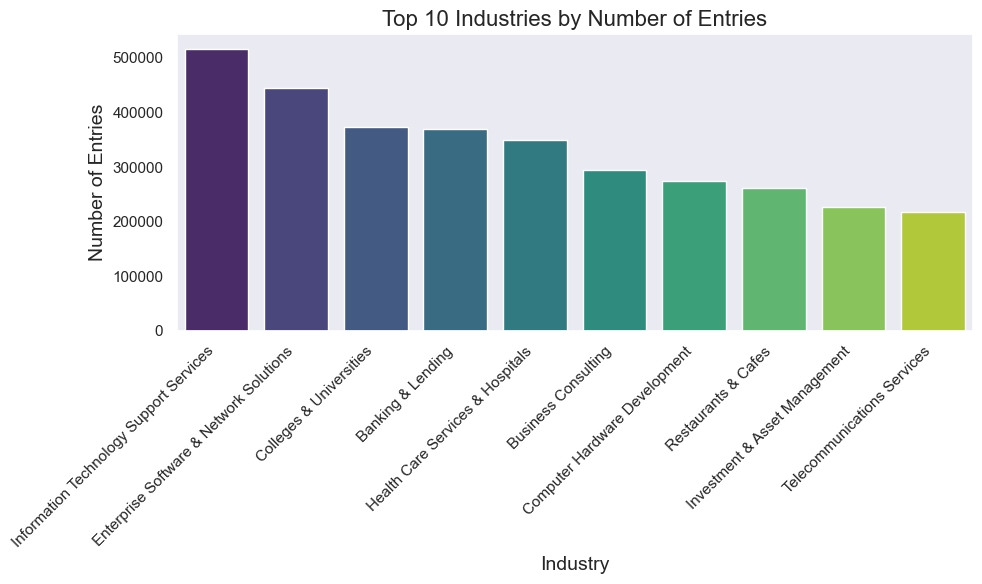

Internet & Web Services: 209845 entries
Accounting & Tax: 162829 entries
General Merchandise & Superstores: 98502 entries
Restaurants & Cafes: 262260 entries
Business Consulting: 294820 entries
Information Technology Support Services: 517189 entries
Computer Hardware Development: 274226 entries
Software Development: 177693 entries
Home Furniture & Housewares Stores: 76680 entries
National Agencies: 123296 entries
Banking & Lending: 369257 entries
Enterprise Software & Network Solutions: 444780 entries
Telecommunications Services: 217676 entries
Shipping & Trucking: 95056 entries
Investment & Asset Management: 226506 entries
Car & Truck Rental: 24968 entries
Department, Clothing & Shoe Stores: 202925 entries
Aerospace & Defense: 87513 entries
Grocery Stores: 123782 entries
Insurance Carriers: 136624 entries
HR Consulting: 156354 entries
Health Care Services & Hospitals: 350265 entries
Food & Beverage Manufacturing: 74624 entries
Civic & Social Services: 50965 entries
Hotels & Resorts: 7

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

industry_counts = df['industryName'].value_counts().head(10)
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis", hue=industry_counts.index, ax=ax)
ax.set_title('Top 10 Industries by Number of Entries', fontsize=16)
ax.set_xlabel('Industry', fontsize=14)
ax.set_ylabel('Number of Entries', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

for industry in df['industryName'].unique():
    print(f"{industry}: {len(df[df['industryName'] == industry])} entries")

2. Number of entries per country

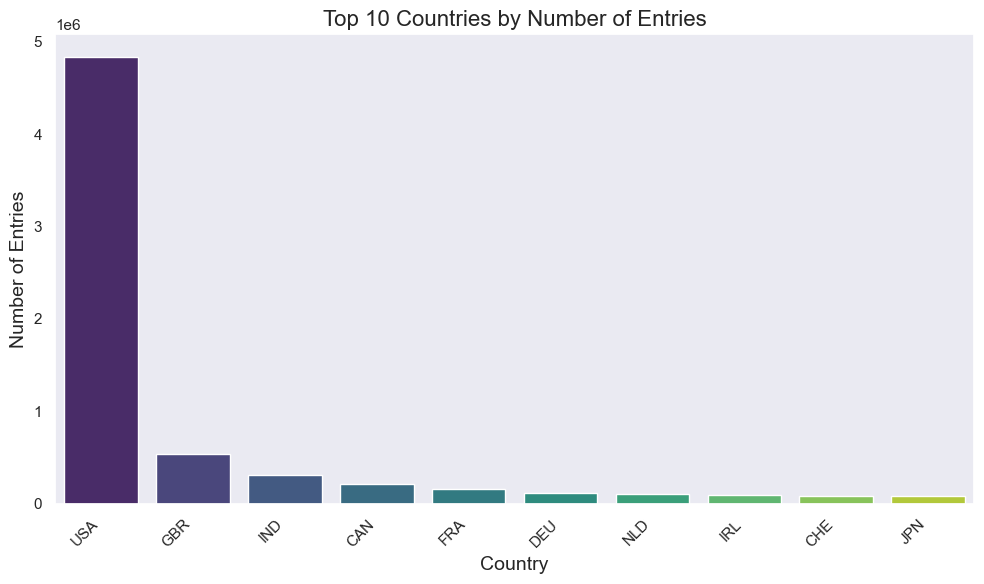

USA: 4835729 entries
GBR: 544077 entries
IRL: 97805 entries
IND: 310702 entries
JPN: 86190 entries
NLD: 111125 entries
DNK: 37040 entries
nan: 0 entries
FRA: 162607 entries
SVK: 21555 entries
DEU: 114765 entries
RUS: 17409 entries
CAN: 216025 entries
CHE: 86214 entries
SWE: 25998 entries
KOR: 25134 entries
ESP: 19889 entries
FIN: 21369 entries
SGP: 45633 entries
BMU: 9210 entries
CHN: 28622 entries
NOR: 9875 entries
BGD: 10617 entries
HKG: 10217 entries
AUS: 55341 entries
ISR: 13312 entries
PAN: 1421 entries
BEL: 12802 entries
AUT: 4430 entries
TUR: 3186 entries
CHL: 2142 entries
LUX: 6901 entries
ITA: 13257 entries
EST: 1344 entries
MEX: 5624 entries
PRI: 1212 entries
BRA: 10983 entries
CZE: 6704 entries
HUN: 1246 entries
CYM: 2488 entries
IDN: 6032 entries
ALB: 1948 entries
PHL: 1102 entries
EGY: 806 entries
NZL: 3860 entries
SAU: 2848 entries
TWN: 6254 entries
ARG: 997 entries
BGR: 1908 entries
LIE: 988 entries
QAT: 2696 entries
PRT: 587 entries
GGY: 4506 entries
MYS: 2330 entries
P

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

country_count = df['country_code'].value_counts().head(10)
sns.barplot(x=country_count.index, y=country_count.values, palette="viridis", hue=country_count.index, ax=ax)
ax.set_title('Top 10 Countries by Number of Entries', fontsize=16)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Number of Entries', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

for country in df['country_code'].unique():
    print(f"{country}: {len(df[df['country_code'] == country])} entries")

## Visualising Distributions

1) Distribution of overall ratings

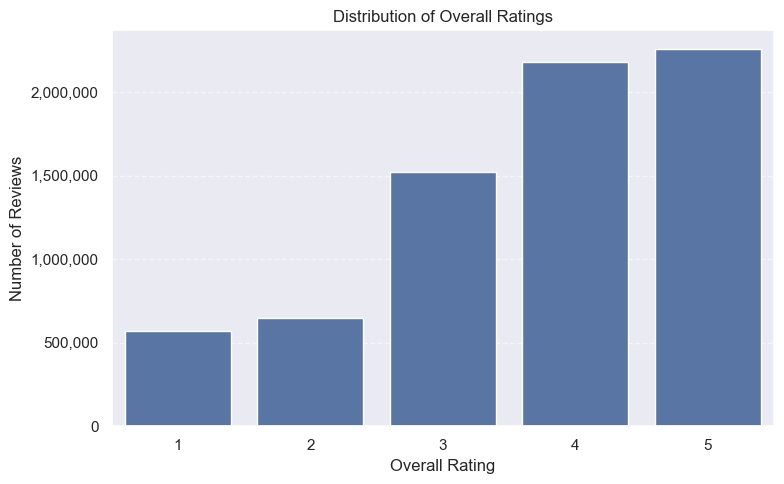

In [14]:
order = [1, 2, 3, 4, 5]
df["rating_overall_num"] = pd.to_numeric(df["rating_overall"], errors="coerce").round()

plt.figure(figsize=(8,5))
ax = sns.countplot(
    x="rating_overall_num",
    data=df,
    order=order,
)
ax.set_title("Distribution of Overall Ratings")
ax.set_xlabel("Overall Rating")
ax.set_ylabel("Number of Reviews")  
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
ax.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

2) Distribution of dates of reviews

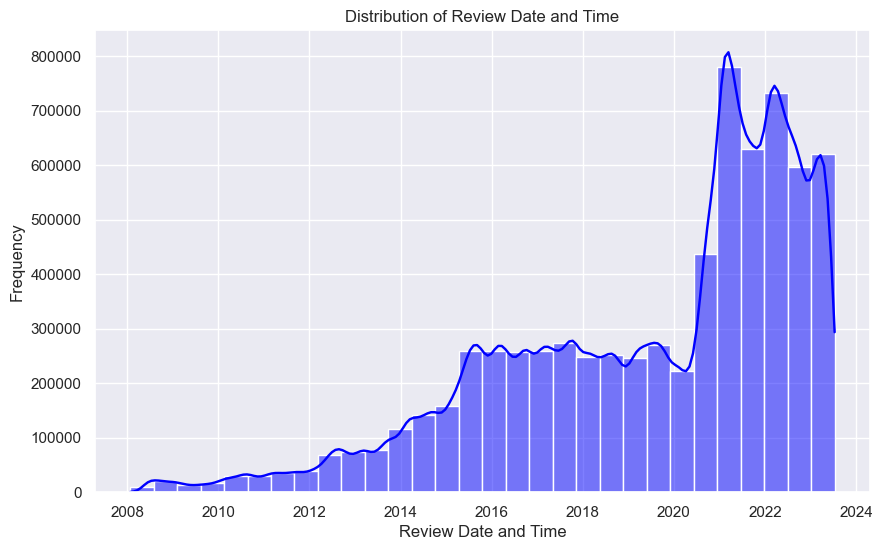

In [15]:
df['review_date_time'] = pd.to_datetime(df['review_date_time'])
plt.figure(figsize=(10,6))
sns.histplot(df['review_date_time'], bins=30, kde=True, color='#0000ff', line_kws={'linewidth': 1.75})
plt.title('Distribution of Review Date and Time')
plt.xlabel('Review Date and Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

3) Distribution of employment types

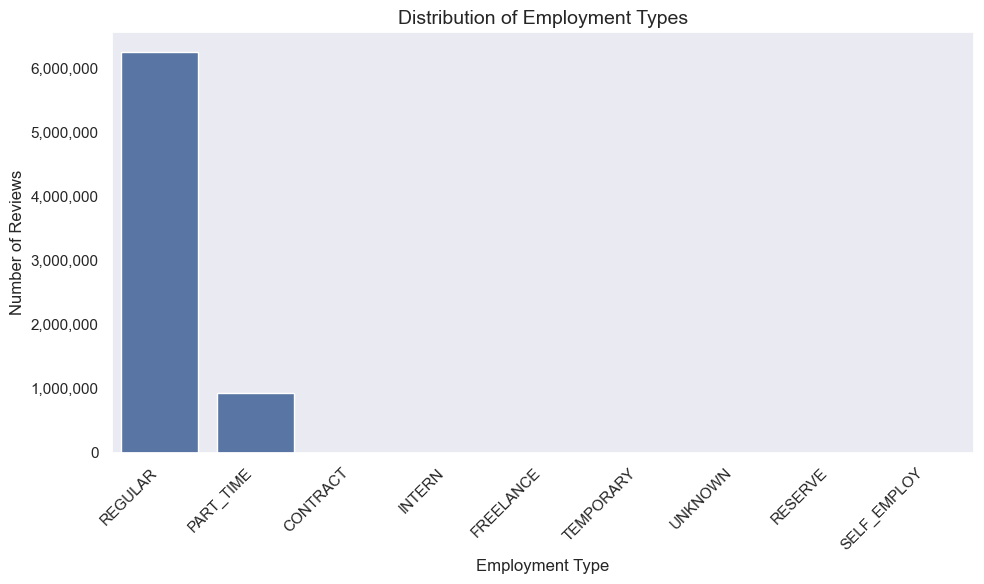

In [16]:

plt.figure(figsize=(10,6))
ax = sns.countplot(
    x="employment_status",
    data=df,
    order=df["employment_status"].value_counts().index,
)

ax.set_title("Distribution of Employment Types", fontsize=14)
ax.set_xlabel("Employment Type", fontsize=12)
ax.set_ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=45, ha="right")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()


## Questions

1) Correlation between ratings

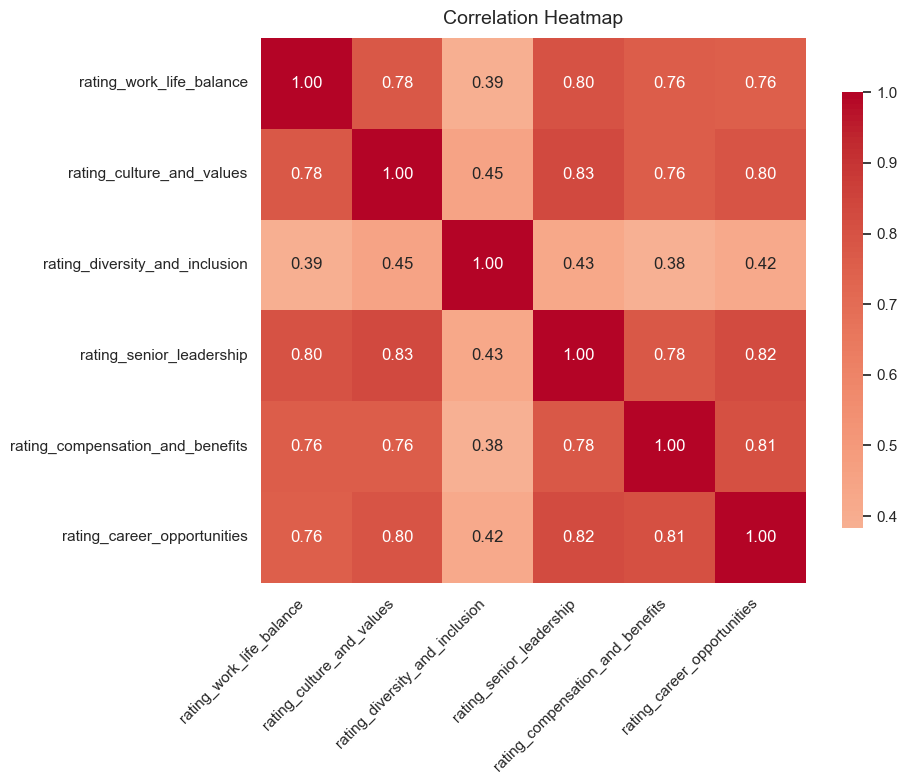

In [17]:
cols = [
    "rating_work_life_balance",
    "rating_culture_and_values",
    "rating_diversity_and_inclusion",
    "rating_senior_leadership",
    "rating_compensation_and_benefits",
    "rating_career_opportunities",
]

df_subset = df[cols]

corr_matrix = df_subset.corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap="coolwarm",     
    center=0,             
    fmt=".2f",           
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title("Correlation Heatmap", fontsize=14, pad=10)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 2) Logistic regression to calculate probability of affecting stress

2a) Effects of ratings on stress levels

Optimization terminated successfully.
         Current function value: 0.201665
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          DV_has_stress   No. Observations:              7171483
Model:                          Logit   Df Residuals:                  7171476
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                 0.02527
Time:                        11:15:15   Log-Likelihood:            -1.4462e+06
converged:                       True   LL-Null:                   -1.4837e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.7078      0.003   -863.34

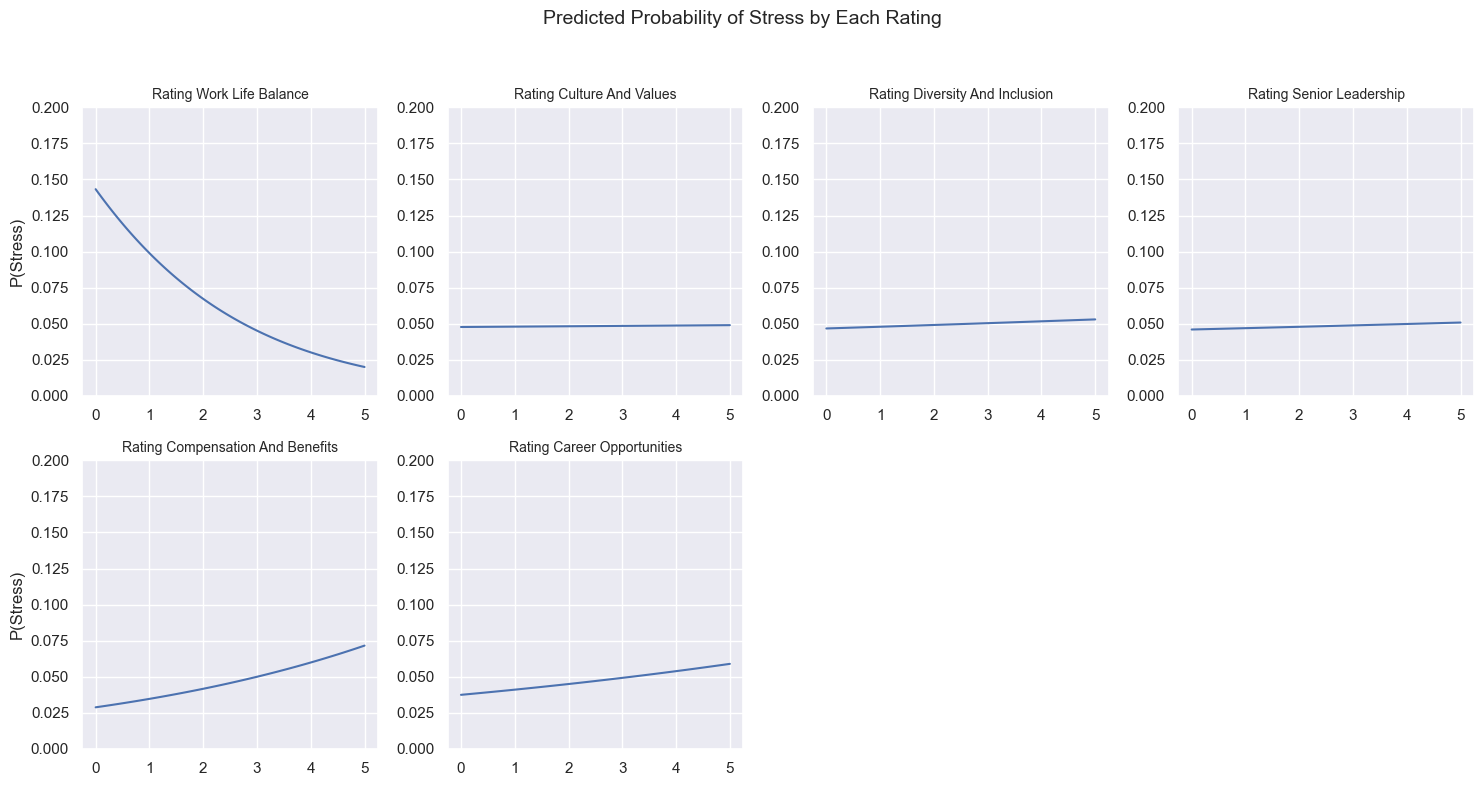

In [18]:
import statsmodels.api as sm
features = [
    "rating_work_life_balance",
    "rating_culture_and_values",
    "rating_diversity_and_inclusion",
    "rating_senior_leadership",
    "rating_compensation_and_benefits",
    "rating_career_opportunities"
]

X = df[features]
y = df["DV_has_stress"]

X = sm.add_constant(X)

model = sm.Logit(y, X).fit()
print(model.summary())

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features, 1):
    x_range = np.linspace(df[feature].min(), df[feature].max(), 100)

    X_plot = pd.DataFrame(np.tile(X.mean().values, (100, 1)), columns=X.columns)

    X_plot[feature] = x_range

    pred_probs = model.predict(X_plot)

    plt.subplot(2, 4, i)
    sns.lineplot(x=x_range, y=pred_probs)
    plt.title(feature.replace("_", " ").title(), fontsize=10)
    plt.xlabel("")
    plt.ylabel("P(Stress)" if i in [1, 5] else "")
    plt.ylim(0, 0.2)
    plt.grid(True)

plt.suptitle("Predicted Probability of Stress by Each Rating", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### We can infer that most ratings don't affect stress levels in a significant way except two.
1) Higher work life balance rating usually leads to lower stress which is understandable.

2) Higher compensation and benefits usually leads to higher stress. This could be because higher compensation usually is associated with a higher position, and more responsibilities.

In [19]:
df.head(1)



,id,industryName,country_code,employee_count,review_date_time,rating_overall,rating_ceo,rating_business_outlook,rating_work_life_balance,rating_culture_and_values,rating_diversity_and_inclusion,rating_senior_leadership,rating_recommend_to_friend,rating_career_opportunities,rating_compensation_and_benefits,is_current_job,length_of_employment,job_title,location,pros,cons,summary,count_helpful,company_id,org_uuid,amount_of_funding_rounds_until_now,total_funding_until_now,rating_ceo_imputed,rating_business_outlook_imputed,rating_recommend_to_friend_imputed,employment_status,year,has_stress,DURING_COVID,POST_COVID,during_covid_1_6_months,during_covid_2_6_months,during_covid_3_6_months,in_each_period,processed_location,DV_has_stress,DV_has_stress_MENTALROBERTA,rating_overall_num
0,6036,Internet & Web Services,USA,10000+,2023-07-01 23:09:36.113,4,DISAPPROVE,NEGATIVE,5,3,4,3,POSITIVE,5,4,False,2,Senior Consultant,"Salt Lake City, UT","Great environment, lots of great and meaningful networking opportunities","Last in, first out for layoffs.",Would consider returning,0.0,6036.0,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,3,8.108000e+09,DISAPPROVE,NEGATIVE,POSITIVE,REGULAR,2023,0,0,1,0,0,0,1,NaN,0,0.0002,4


3) Are higher compensations and benefits associated with higher ratings?

                                  rating_overall_num  \
rating_compensation_and_benefits                       
0                                           3.857259   
1                                           1.885325   
2                                           2.761068   
3                                           3.411368   
4                                           3.959342   
5                                           4.574923   

                                  rating_work_life_balance  \
rating_compensation_and_benefits                             
0                                                 0.074858   
1                                                 2.073188   
2                                                 2.813857   
3                                                 3.256998   
4                                                 3.660936   
5                                                 4.260374   

                                  rating_culture_and_v

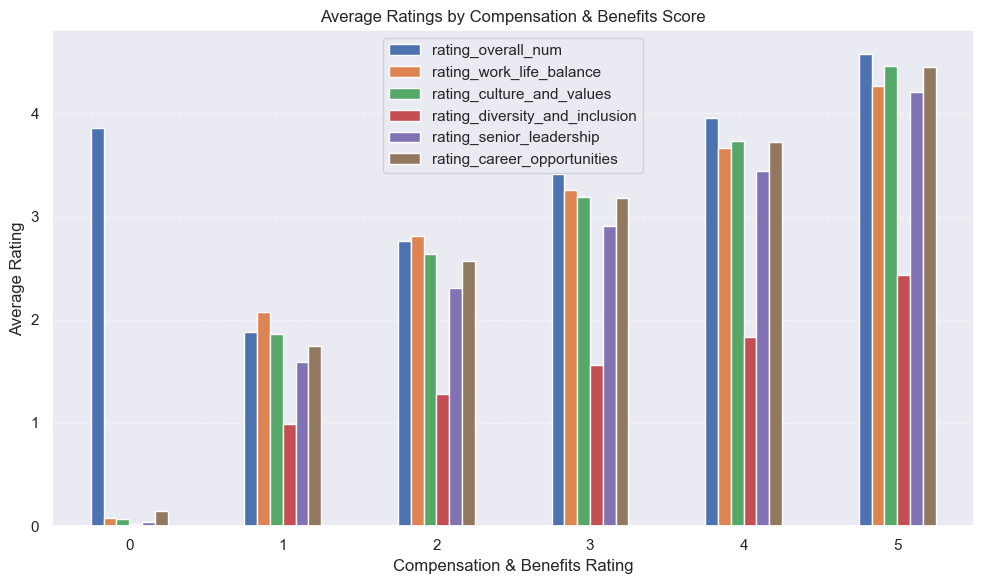

In [20]:
rating_cols = [
    "rating_overall_num",
    "rating_work_life_balance",
    "rating_culture_and_values",
    "rating_diversity_and_inclusion",
    "rating_senior_leadership",
    "rating_career_opportunities",
]

summary = (
    df[["rating_compensation_and_benefits"] + rating_cols]
    .dropna()
    .groupby("rating_compensation_and_benefits")
    .mean()
)

print(summary)

ax = summary.plot(kind="bar", figsize=(10, 6))
ax.set_title("Average Ratings by Compensation & Benefits Score")
ax.set_xlabel("Compensation & Benefits Rating")
ax.set_ylabel("Average Rating")
ax.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

4) Which features are most predictive of a high overall rating?

In [21]:
from sklearn.model_selection import train_test_split

columns_to_use = ["industryName" , "country_code", "rating_overall", "rating_ceo_imputed", "rating_business_outlook_imputed", "rating_work_life_balance", "rating_culture_and_values", "rating_diversity_and_inclusion", "rating_senior_leadership", "rating_recommend_to_friend_imputed", "rating_career_opportunities", "rating_compensation_and_benefits", "length_of_employment", "employment_status"]
df_new = df[columns_to_use].copy()
df_new.head()


,industryName,country_code,rating_overall,rating_ceo_imputed,rating_business_outlook_imputed,rating_work_life_balance,rating_culture_and_values,rating_diversity_and_inclusion,rating_senior_leadership,rating_recommend_to_friend_imputed,rating_career_opportunities,rating_compensation_and_benefits,length_of_employment,employment_status
0,Internet & Web Services,USA,4,DISAPPROVE,NEGATIVE,5,3,4,3,POSITIVE,5,4,2,REGULAR
1,Internet & Web Services,USA,4,DISAPPROVE,NEGATIVE,3,3,4,3,POSITIVE,3,4,2,REGULAR
2,Internet & Web Services,USA,4,NO_OPINION,NEUTRAL,3,4,4,4,POSITIVE,5,4,4,REGULAR
3,Internet & Web Services,USA,3,DISAPPROVE,POSITIVE,3,5,5,1,POSITIVE,5,5,4,REGULAR
4,Internet & Web Services,USA,4,APPROVE,POSITIVE,4,4,5,4,POSITIVE,4,4,0,REGULAR


In [22]:
df_new.isna().sum()

industryName                           44546
country_code                          126902
rating_overall                             0
rating_ceo_imputed                         0
rating_business_outlook_imputed            0
rating_work_life_balance                   0
rating_culture_and_values                  0
rating_diversity_and_inclusion             0
rating_senior_leadership                   0
rating_recommend_to_friend_imputed         0
rating_career_opportunities                0
rating_compensation_and_benefits           0
length_of_employment                       0
employment_status                          0
dtype: int64

In [23]:
print(len(df_new))
cols_required = ["industryName", "country_code"]
df_new = df_new.dropna(subset=cols_required).reset_index(drop=True)
print(len(df_new))

7171483
7004693


In [24]:
df_new.head(2)

,industryName,country_code,rating_overall,rating_ceo_imputed,rating_business_outlook_imputed,rating_work_life_balance,rating_culture_and_values,rating_diversity_and_inclusion,rating_senior_leadership,rating_recommend_to_friend_imputed,rating_career_opportunities,rating_compensation_and_benefits,length_of_employment,employment_status
0,Internet & Web Services,USA,4,DISAPPROVE,NEGATIVE,5,3,4,3,POSITIVE,5,4,2,REGULAR
1,Internet & Web Services,USA,4,DISAPPROVE,NEGATIVE,3,3,4,3,POSITIVE,3,4,2,REGULAR


### Model Testing

We will split the dataset into train and test sets and train classifiers on them, to find the most predictive features in regards to our goals.

#### **Phases:**
1) Use tabular features only, train classical ML models on the data to find
- Feature importance
- Baseline performance
2) NLP, text features only, extract from pros/cons/summary
- Bag of Words, TF-IDF, TextBlob

- Logistic Regression, CountVectorizer() etc.
3) Multimodal Fusion


In [25]:
# Rating ceo imputed: DISAPPROVE, NO_OPINION, APPROVE
# Rating business outlook imputed: NEGATIVE, NEUTRAL, POSITIVE
# Rating recommend to friend imputed: POSITIVE, NEGATIVE
# Rating employment status: REGULAR, PART_TIME, INTERN, UNKNOWN, CONTRACT, FREELANCE, TEMPORARY, RESERVE, SELF_EMPLOY
print(df_new.head(2))

map_ceo = {
    "DISAPPROVE": 0,
    "NO_OPINION": 1,
    "APPROVE": 2
}

map_business = {
    "NEGATIVE": 0,
    "NEUTRAL": 1,
    "POSITIVE": 2
}

map_recommend = {
    "NEGATIVE": 0,
    "POSITIVE": 1
}
map_employment = {
    "REGULAR": 0,
    "PART_TIME": 1,
    "INTERN": 2,
    "UNKNOWN": 3,
    "CONTRACT": 4,
    "FREELANCE": 5,
    "TEMPORARY": 6,
    "RESERVE": 7,
    "SELF_EMPLOY": 8
}

df_new['rating_ceo_imputed'] = df_new['rating_ceo_imputed'].map(map_ceo)
df_new['rating_business_outlook_imputed'] = df_new['rating_business_outlook_imputed'].map(map_business)
df_new['rating_recommend_to_friend_imputed'] = df_new['rating_recommend_to_friend_imputed'].map(map_recommend)
df_new['employment_status'] = df_new['employment_status'].map(map_employment)
df_new.head(2)


              industryName country_code  rating_overall rating_ceo_imputed  \
0  Internet & Web Services          USA               4         DISAPPROVE   
1  Internet & Web Services          USA               4         DISAPPROVE   

  rating_business_outlook_imputed  rating_work_life_balance  \
0                        NEGATIVE                         5   
1                        NEGATIVE                         3   

   rating_culture_and_values  rating_diversity_and_inclusion  \
0                          3                               4   
1                          3                               4   

   rating_senior_leadership rating_recommend_to_friend_imputed  \
0                         3                           POSITIVE   
1                         3                           POSITIVE   

   rating_career_opportunities  rating_compensation_and_benefits  \
0                            5                                 4   
1                            3                 

,industryName,country_code,rating_overall,rating_ceo_imputed,rating_business_outlook_imputed,rating_work_life_balance,rating_culture_and_values,rating_diversity_and_inclusion,rating_senior_leadership,rating_recommend_to_friend_imputed,rating_career_opportunities,rating_compensation_and_benefits,length_of_employment,employment_status
0,Internet & Web Services,USA,4,0,0,5,3,4,3,1,5,4,2,0
1,Internet & Web Services,USA,4,0,0,3,3,4,3,1,3,4,2,0


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from category_encoders.target_encoder import TargetEncoder
x = df_new.drop("rating_overall", axis=1)
y = df_new["rating_overall"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size = 0.2,
    stratify = y,
    random_state = 42
)

x_train_v1 = x_train.copy()
x_test_v1 = x_test.copy()

num_features = x.select_dtypes(include=['int64', 'float64']).columns
cat_features = x.select_dtypes(include=['object']).columns

print("Numerical Features:", num_features.tolist())
print("Categorical Features:", cat_features.tolist())


Numerical Features: ['rating_ceo_imputed', 'rating_business_outlook_imputed', 'rating_work_life_balance', 'rating_culture_and_values', 'rating_diversity_and_inclusion', 'rating_senior_leadership', 'rating_recommend_to_friend_imputed', 'rating_career_opportunities', 'rating_compensation_and_benefits', 'length_of_employment', 'employment_status']
Categorical Features: ['industryName', 'country_code']


# Pipeline

We create a function to automatically build different pre-processing strategies to evaluate how each impacts model performance. 


In [27]:
from sklearn.metrics import accuracy_score


def build_pipeline(
        imputer_num="mean",
        imputer_cat="most_frequent",
        encoder="onehot",
        scaler="none",
        model="rf",
        task="classification",
        num_features=None,
        cat_features=None
):
    
    # Numerical Imputers
    if imputer_num == "mean":
        num_imputer = SimpleImputer(strategy="mean")
    elif imputer_num == "median":
        num_imputer = SimpleImputer(strategy="median")
    elif imputer_num == "zero":
        num_imputer = SimpleImputer(strategy="constant", fill_value=0)
    elif imputer_num == "knn":
        num_imputer = KNNImputer(n_neighbors=5)
    else:
        raise ValueError("Unknown imputer_num")
    
    # Categorical Imputers
    if imputer_cat == "most_frequent":
        cat_imputer = SimpleImputer(strategy="most_frequent")
    elif imputer_cat == "unknown":
        cat_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")
    else:
        raise ValueError("Unknown imputer_cat")

    # Encoders
    if encoder == "onehot":
        encoder_transform = OneHotEncoder(handle_unknown="ignore")
    elif encoder == "ordinal":
        encoder_transform = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    elif encoder == "target":
        encoder_transform = TargetEncoder()
    else:
        raise ValueError("Unknown encoder")

    # Scalers
    if scaler == "none":
        scaler_transform = "passthrough"
    elif scaler == "standard":
        scaler_transform = StandardScaler()
    elif scaler == "minmax":
        scaler_transform = MinMaxScaler()
    elif scaler == "robust":
        scaler_transform = RobustScaler()
    else:
        raise ValueError("Unknown scaler")

    # Classifiers / Regressors
    if task == "classification":
        if model == "rf":
            model_obj = RandomForestClassifier()
        elif model == "svm":
            model_obj = SVC()
        elif model == "knn":
            model_obj = KNeighborsClassifier()
        elif model == "logreg":
            model_obj = LogisticRegression(max_iter=500)
        else:
            raise ValueError("Unknown classifier")
    else:
        if model == "rf":
            model_obj = RandomForestRegressor()
        elif model == "svm":
            model_obj = SVR()
        elif model == "knn":
            model_obj = KNeighborsRegressor()
        elif model == "linreg":
            model_obj = LinearRegression()
        else:
            raise ValueError("Unknown regressor")
        
    
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", Pipeline([("imputer", num_imputer), ("scaler", scaler_transform)]), num_features),
            ("cat", Pipeline([("imputer", cat_imputer), ("encoder", encoder_transform)]), cat_features)
        ]
    )

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model_obj)
    ])

    return pipeline

In [ ]:
pipelines = []

for imp_num in ["mean", "median"]:
    for enc in ["onehot", "target"]:
        for scale in ["none", "standard"]:
            for model in ["rf", "svm"]:
                pipe = build_pipeline(
                    imputer_num=imp_num,
                    imputer_cat="most_frequent",
                    encoder=enc,
                    scaler=scale,
                    model=model,
                    task="classification",
                    num_features=num_features,
                    cat_features=cat_features
                )
                pipelines.append((
                    f"num={imp_num} | enc={enc} | scale={scale} | model={model}",
                    pipe
                ))

results = []

for name, pipe in pipelines:
    pipe.fit(x_train, y_train)
    preds = pipe.predict(x_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))

results = sorted(results, key=lambda x: x[1], reverse=True)

for r in results:
    print(r)


# sample = x_train.sample(frac=0.03, random_state=42)
# y_sample = y_train.loc[sample.index]

# from category_encoders import TargetEncoder
# te = TargetEncoder()
# te.fit(sample[cat_features], y_sample)

# x_train_te = x_train.copy()
# x_test_te = x_test.copy()

# x_train_te[cat_features] = te.transform(x_train[cat_features])
# x_test_te[cat_features] = te.transform(x_test[cat_features])


# pipe = Pipeline([
#     ("imputer_num", SimpleImputer(strategy="mean")),
#     ("model", RandomForestClassifier(n_estimators=200, n_jobs=-1))
# ])

# pipe.fit(x_train_te, y_train)

# preds = pipe.predict(x_test_te) 
# acc = accuracy_score(y_test, preds)

# print("Accuracy:", acc)


# %pip install catboost
# from catboost import CatBoostClassifier, Pool

# cat_cols = [x_train.columns.get_loc("industryName"),
#             x_train.columns.get_loc("country_code")]

# train_pool = Pool(x_train, y_train, cat_features=cat_cols)
# test_pool = Pool(x_test, y_test, cat_features=cat_cols)

# model = CatBoostClassifier(
#     iterations=300,
#     learning_rate=0.1,
#     depth=8,
#     loss_function="MultiClass",
#     verbose=100
# )

# model.fit(train_pool)
# preds = model.predict(test_pool)
# acc = accuracy_score(y_test, preds)
# print(acc)

